<a href="https://colab.research.google.com/github/meriemdouider1/pfe/blob/main/FOR%20CXPIPIENS%20FINAL-.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy 
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

In [3]:
Cl = '/content/cx_pipien equi.xlsx'
data= pd.read_excel(Cl,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True)

In [4]:
del data["Source"]
del data["CodeSite"]

In [5]:
data

,X_long,Y_lat,Cx_pipiens,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.167180,27.157730,1,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
4,-13.207000,27.165000,1,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,12,0,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.800000,17.400000,18.900000,20.000000,19.500000,18.000000,15.400000,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-5.333333,35.266667,1,11.136305,139.052841,8.974447,27.155428,0.614620,0,0,0,0,0,0,0,0,100,0,0,1910,470,130,70,66,5,2,73,1480,2470,782,123,212,0,14998,628,105,12,92,3,0,...,25.799999,21.200001,17.799999,14.500000,3.8,4.7,7.1,9.7,11.900000,16.500000,21.500000,21.100000,17.900000,13.400000,9.900000,6.6,0.90,0.95,1.00,1.07,1.24,1.46,1.60,1.67,1.56,1.35,1.11,0.99,3.3,3.5,3.6,3.8,3.4,3.5,3.3,3.0,3.1,3.3,3.2,3.1
206,-5.218206,35.348765,1,24.167864,101.951973,6.131610,13.230689,0.796660,0,0,0,23,13,14,11,7,31,0,0,1790,300,70,20,67,4,0,71,1450,2080,610,216,377,0,14747,538,85,13,91,2,0,...,24.600000,18.799999,15.400000,12.700000,3.6,4.2,6.3,8.9,11.400000,15.500000,19.900000,19.799999,17.400000,11.600000,8.200000,5.5,0.84,0.88,0.92,0.99,1.13,1.32,1.45,1.53,1.44,1.25,1.04,0.94,4.0,4.7,5.0,4.6,4.2,3.5,3.5,3.6,4.0,4.3,3.9,3.8
207,-6.03333

In [6]:
(data[data["Cx_pipiens"]==1]).count

<bound method DataFrame.count of         X_long      Y_lat  Cx_pipiens  ...  Vent_Oct  Vent_Nov  Vent_Dec
3   -13.167180  27.157730           1  ...       4.2       3.6       3.8
4   -13.207000  27.165000           1  ...       4.6       3.8       3.9
5   -13.214230  27.166700           1  ...       4.4       3.6       3.8
6   -13.214230  27.166700           1  ...       4.4       3.6       3.8
7   -13.214230  27.166700           1  ...       4.4       3.6       3.8
..         ...        ...         ...  ...       ...       ...       ...
205  -5.333333  35.266667           1  ...       3.3       3.2       3.1
206  -5.218206  35.348765           1  ...       4.3       3.9       3.8
207  -6.033333  35.466667           1  ...       3.1       3.4       3.4
208  -5.366667  35.566667           1  ...       3.7       3.5       3.5
209  -5.833954  35.759465           1  ...       3.5       3.8       3.9

[105 rows x 226 columns]>

In [7]:
(data[data["Cx_pipiens"]==0]).count

<bound method DataFrame.count of        X_long     Y_lat  Cx_pipiens  ...  Vent_Oct  Vent_Nov  Vent_Dec
0   -15.91142  23.79474           0  ...       5.4       5.5       4.9
1   -13.18837  27.13295           0  ...       4.3       3.7       3.8
2   -13.18837  27.13295           0  ...       4.3       3.7       3.8
10  -10.27508  29.08243           0  ...       3.5       3.5       3.4
11   -9.49015  29.21906           0  ...       3.8       3.2       3.1
..        ...       ...         ...  ...       ...       ...       ...
125  -6.20400  30.68600           0  ...       3.1       3.5       3.3
126  -6.23900  30.69500           0  ...       2.7       3.0       3.2
127  -6.91000  30.91300           0  ...       2.7       2.9       2.8
128  -6.86400  30.86600           0  ...       3.4       3.4       3.6
130  -4.98700  31.72800           0  ...       2.5       2.3       2.4

[105 rows x 226 columns]>

In [8]:
X1 = data.loc[:, data.columns != 'Cx_pipiens']
y1 = data.Cx_pipiens

In [9]:
features=['Coniferes', 'ZoneAride', 'Lesfeuillus', 'Autres', 'Max_NDVI',
       'Tmax_Mars', 'Tmin_Avril', 'Vent_Mars']

In [10]:
X1[features]

,Coniferes,ZoneAride,Lesfeuillus,Autres,Max_NDVI,Tmax_Mars,Tmin_Avril,Vent_Mars
0,0,97,0,0,1113,22.700001,15.6,6.1
1,0,100,0,0,1090,24.000000,14.7,4.8
2,0,100,0,0,1090,24.000000,14.7,4.8
3,0,100,0,0,1064,24.100000,15.2,5.0
4,0,74,0,0,1086,24.200001,14.9,5.1
...,...,...,...,...,...,...,...,...
205,0,0,0,0,1558,18.000000,9.7,3.6
206,0,0,23,14,1572,14.900000,8.9,5.0
207,0,6,0,0,1287,18.200001,13.2,3.7
208,0,0,0,0,1230,19.100000,12.2,3.9


In [11]:
X=X1[features]

In [12]:
X

,Coniferes,ZoneAride,Lesfeuillus,Autres,Max_NDVI,Tmax_Mars,Tmin_Avril,Vent_Mars
0,0,97,0,0,1113,22.700001,15.6,6.1
1,0,100,0,0,1090,24.000000,14.7,4.8
2,0,100,0,0,1090,24.000000,14.7,4.8
3,0,100,0,0,1064,24.100000,15.2,5.0
4,0,74,0,0,1086,24.200001,14.9,5.1
...,...,...,...,...,...,...,...,...
205,0,0,0,0,1558,18.000000,9.7,3.6
206,0,0,23,14,1572,14.900000,8.9,5.0
207,0,6,0,0,1287,18.200001,13.2,3.7
208,0,0,0,0,1230,19.100000,12.2,3.9


In [13]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score

XGBClassifier


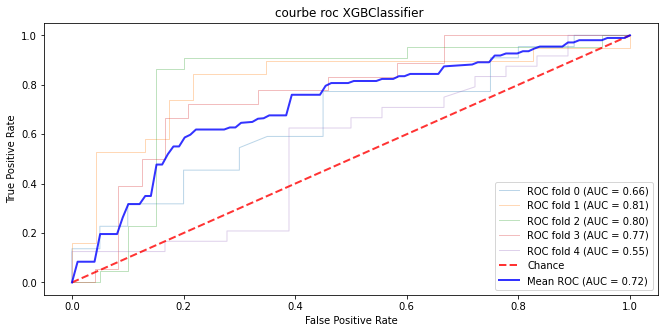

Accuracy: [0.57142857 0.76190476 0.85714286 0.73809524 0.57142857]
moy_accuracy: 0.70
precision: [0.59090909 0.73684211 0.83333333 0.70588235 0.65      ]
moy_precision: 0.70
sensibilité : [0.59090909 0.73684211 0.90909091 0.66666667 0.54166667]
moy_sensibilité: 0.69
spécificité : [0.55       0.7826087  0.8        0.79166667 0.61111111]
moy_spécificité: 0.71
MCC : [0.14090909 0.5194508  0.71562645 0.46209243 0.15138252]
MCC: 0.40
balanced_accuracy : [0.57045455 0.7597254  0.85454545 0.72916667 0.57638889]
balanced_accuracy: 0.70
roc_auc : [0.65568182 0.81235698 0.80454545 0.7662037  0.5474537 ]
roc_auc: 0.72
cohen_kappa_scorec : [0.14090909 0.5194508  0.71232877 0.46153846 0.14864865]
cohen_kappa_scorec: 0.40
LogisticRegression


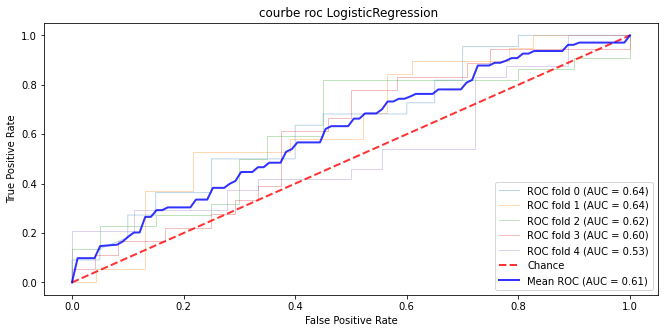

Accuracy: [0.57142857 0.64285714 0.57142857 0.5952381  0.45238095]
moy_accuracy: 0.57
precision: [0.61111111 0.64285714 0.625      0.52631579 0.52631579]
moy_precision: 0.59
sensibilité : [0.5        0.47368421 0.45454545 0.55555556 0.41666667]
moy_sensibilité: 0.48
spécificité : [0.65      0.7826087 0.7       0.625     0.5      ]
moy_spécificité: 0.65
MCC : [ 0.15138252  0.27060404  0.15894099  0.17951966 -0.08285523]
MCC: 0.14
balanced_accuracy : [0.575      0.62814645 0.57727273 0.59027778 0.45833333]
balanced_accuracy: 0.57
roc_auc : [0.64431818 0.64073227 0.62045455 0.60185185 0.53240741]
roc_auc: 0.61
cohen_kappa_scorec : [ 0.14864865  0.26229508  0.15246637  0.17931034 -0.08053691]
cohen_kappa_scorec: 0.13
RandomForestClassifier


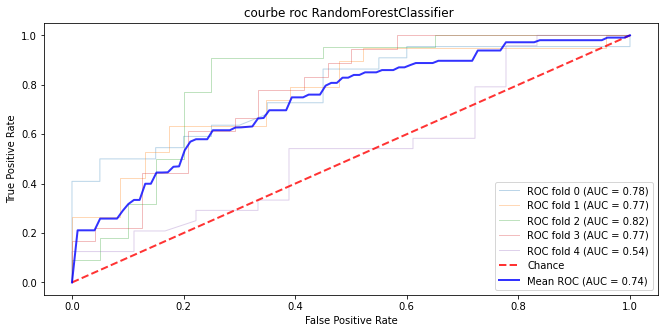

Accuracy: [0.71428571 0.66666667 0.76190476 0.66666667 0.5       ]
moy_accuracy: 0.66
precision: [0.70833333 0.57894737 0.7826087  0.63157895 0.56521739]
moy_precision: 0.65
sensibilité : [0.63636364 0.57894737 0.77272727 0.66666667 0.58333333]
moy_sensibilité: 0.65
spécificité : [0.7        0.73913043 0.75       0.70833333 0.5       ]
moy_spécificité: 0.68
MCC : [ 0.38138504  0.27618409  0.52272727  0.41666667 -0.0138092 ]
MCC: 0.32
balanced_accuracy : [0.69090909 0.66361556 0.78409091 0.71527778 0.52083333]
balanced_accuracy: 0.67
roc_auc : [0.75568182 0.77574371 0.84090909 0.7662037  0.54050926]
roc_auc: 0.74
cohen_kappa_scorec : [0.28246014 0.27586207 0.52272727 0.37241379 0.02777778]
cohen_kappa_scorec: 0.30
GradientBoostingClassifier


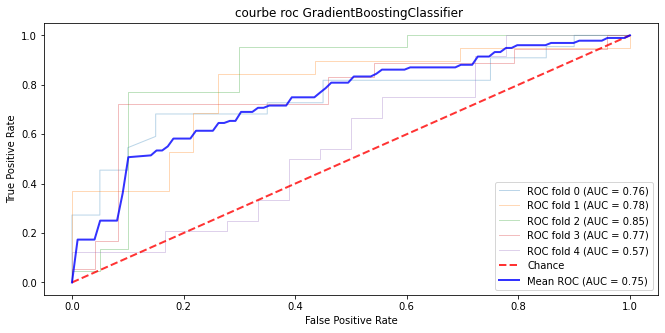

Accuracy: [0.66666667 0.71428571 0.78571429 0.76190476 0.5       ]
moy_accuracy: 0.69
precision: [0.68181818 0.68421053 0.76       0.72222222 0.58823529]
moy_precision: 0.69
sensibilité : [0.68181818 0.68421053 0.86363636 0.72222222 0.41666667]
moy_sensibilité: 0.67
spécificité : [0.65       0.73913043 0.7        0.79166667 0.61111111]
moy_spécificité: 0.70
MCC : [0.33181818 0.42334096 0.57349664 0.51388889 0.0280056 ]
MCC: 0.37
balanced_accuracy : [0.66590909 0.71167048 0.78181818 0.75694444 0.51388889]
balanced_accuracy: 0.69
roc_auc : [0.75795455 0.78489703 0.85       0.77083333 0.56944444]
roc_auc: 0.75
cohen_kappa_scorec : [0.33181818 0.42334096 0.56750572 0.51388889 0.02649007]
cohen_kappa_scorec: 0.37
GaussianNB


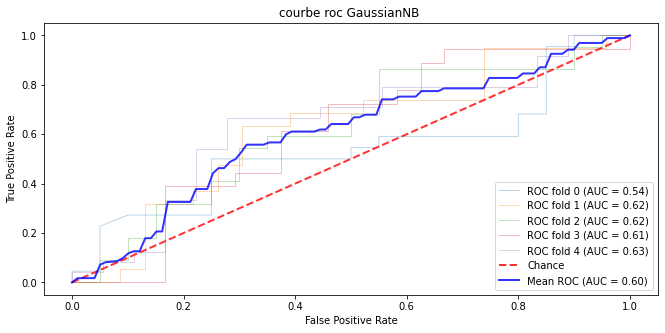

Accuracy: [0.57142857 0.57142857 0.57142857 0.4047619  0.69047619]
moy_accuracy: 0.56
precision: [0.64285714 0.53846154 0.59090909 0.41463415 0.76190476]
moy_precision: 0.59
sensibilité : [0.40909091 0.36842105 0.59090909 0.94444444 0.66666667]
moy_sensibilité: 0.60
spécificité : [0.75       0.73913043 0.55       0.         0.72222222]
moy_spécificité: 0.55
MCC : [ 0.16854997  0.11579411  0.14090909 -0.18033393  0.38490018]
MCC: 0.13
balanced_accuracy : [0.57954545 0.55377574 0.57045455 0.47222222 0.69444444]
balanced_accuracy: 0.57
roc_auc : [0.5375     0.6201373  0.61590909 0.61111111 0.63425926]
roc_auc: 0.60
cohen_kappa_scorec : [ 0.15625     0.11058824  0.14090909 -0.04790419  0.38095238]
cohen_kappa_scorec: 0.15
KNeighborsClassifier


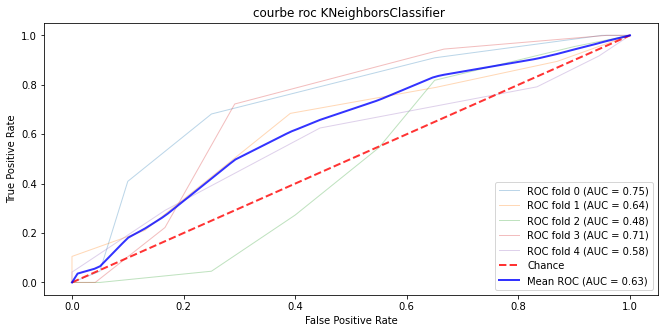

Accuracy: [0.71428571 0.64285714 0.5        0.71428571 0.5952381 ]
moy_accuracy: 0.63
precision: [0.75       0.59090909 0.52173913 0.65       0.65217391]
moy_precision: 0.63
sensibilité : [0.68181818 0.68421053 0.54545455 0.72222222 0.625     ]
moy_sensibilité: 0.65
spécificité : [0.75       0.60869565 0.45       0.70833333 0.55555556]
moy_spécificité: 0.61
MCC : [ 0.43181818  0.29190593 -0.00456103  0.42662346  0.17951966]
MCC: 0.27
balanced_accuracy : [0.71590909 0.64645309 0.49772727 0.71527778 0.59027778]
balanced_accuracy: 0.63
roc_auc : [0.74886364 0.63615561 0.47727273 0.71064815 0.5787037 ]
roc_auc: 0.63
cohen_kappa_scorec : [ 0.42986425  0.28893905 -0.00455581  0.42465753  0.17931034]
cohen_kappa_scorec: 0.26


In [22]:
classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=5,n_estimators=1000,subsample=0.9,
 colsample_bytree=0.9),
    "LogisticRegression": LogisticRegression(max_iter=1500, solver='lbfgs', class_weight='balanced'),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=7)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
def tp2(y_true, y_pred): 
    value = cohen_kappa_score(y_true,y_pred)
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(X, y1)):
         clf.fit(X.loc[train,], y1.loc[train,])
         viz = plot_roc_curve(clf, X.loc[test,], y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf, X, y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X, y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X, y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X, y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X, y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X, y1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X, y1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X, y1, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

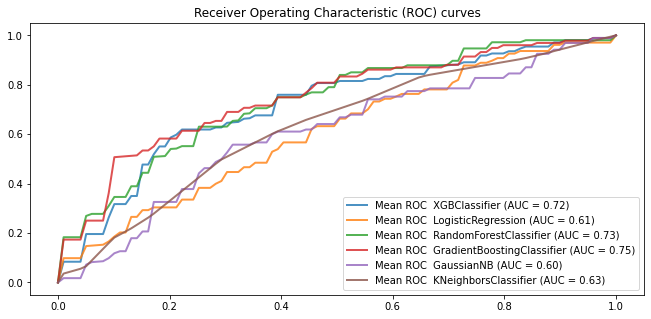

In [23]:
classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=5,n_estimators=1000,subsample=0.9,
 colsample_bytree=0.9),
    "LogisticRegression": LogisticRegression(max_iter=1500, solver='lbfgs', class_weight='balanced'),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=7)
}

# prepare plots
fig, ax_roc = plt.subplots(figsize=(11, 5))
cv = KFold(n_splits=5, random_state=1, shuffle=True)
random_state = np.random.RandomState(0)
for name, clf in classifiers.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    for i, (train, test) in enumerate(cv.split(X, y1)):
        clf.fit(X.loc[train,], y1.loc[train,])
        viz = plot_roc_curve(clf, X.loc[test,], y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax_roc.plot(mean_fpr, mean_tpr,
    label=r'Mean ROC  %s (AUC = %0.2f)' % (name, mean_auc),
        lw=2, alpha=.8)

ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')

plt.legend()
plt.show()

In [24]:
classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=5,n_estimators=1000,subsample=0.9,
 colsample_bytree=0.9),
    "LogisticRegression": LogisticRegression(max_iter=1500, solver='lbfgs', class_weight='balanced'),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=7)
}
for name, clf in classifiers.items():
    print(name)
    # prepare the cross-validation procedure
    loo =LeaveOneOut()
    # evaluate model
    scores1 = cross_val_score(clf, X, y1, scoring='accuracy', cv=loo, n_jobs=-1)
    # report performance
    print('accuracy: %.2f' % mean(scores1))

XGBClassifier
accuracy: 0.67
LogisticRegression
accuracy: 0.59
RandomForestClassifier
accuracy: 0.65
GradientBoostingClassifier
accuracy: 0.68
GaussianNB
accuracy: 0.64
KNeighborsClassifier
accuracy: 0.60
